# 06-Nov-2023

## room_size=xxs

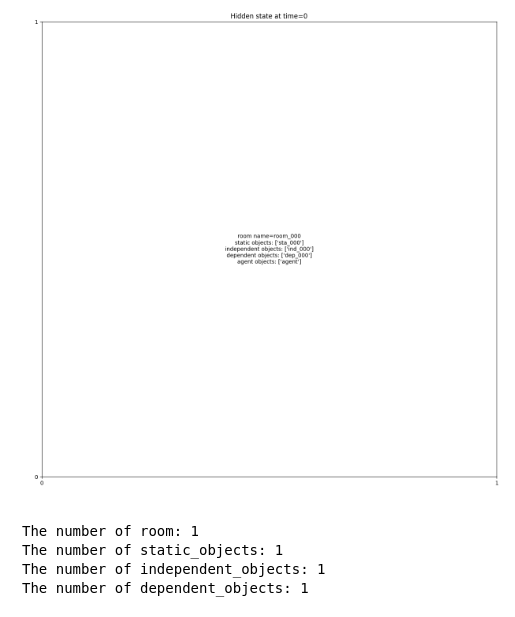

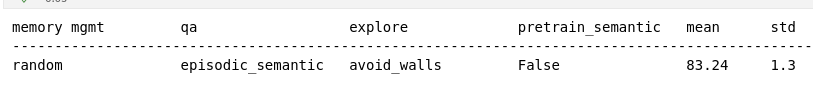

Let's take a look at [the_plot](../training_results/LSTM/xxs/pretrain=False/2023-11-05%2023:32:33.477347/plot.pdf)

In [1]:
from glob import glob
from explicit_memory.utils import read_yaml
import numpy as np

results_all = []
for results_path in glob("../training_results/LSTM/xxs/pretrain=False/*/results.yaml"):
    results = read_yaml(results_path)
    test_score = results["test_score"]["mean"]
    results_all.append(test_score)

np.mean(results_all), np.std(results_all)

(88.36000000000001, 3.0682894257224183)

## room_size=xs
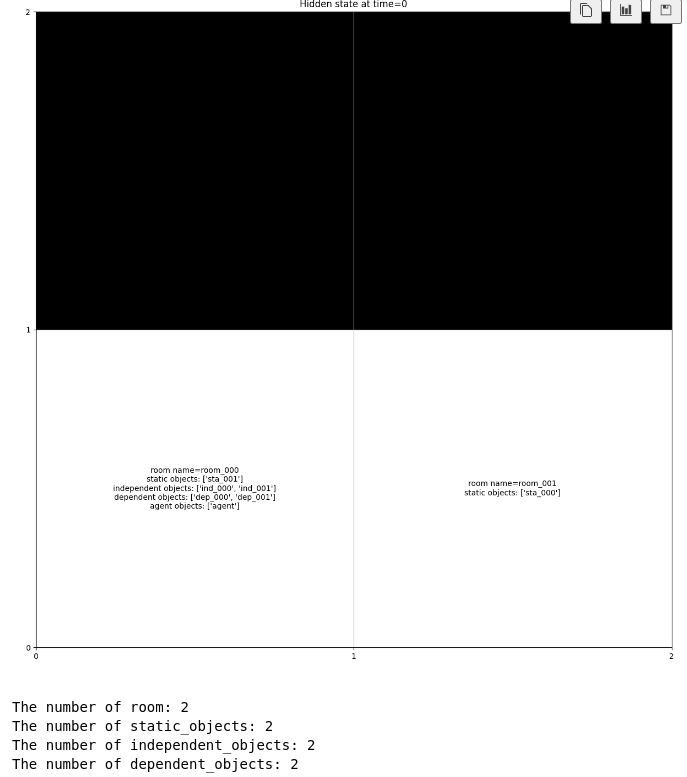

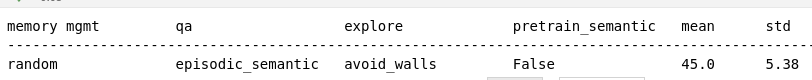

Let's take a look at [the_plot](../training_results/LSTM/xs/pretrain=False/2023-11-06%2000:31:01.622426/plot.pdf)

In [29]:
from glob import glob
from explicit_memory.utils import read_yaml
import numpy as np

results_all = []
for results_path in glob("../training_results/LSTM/xs/pretrain=False/*/results.yaml"):
    results = read_yaml(results_path)
    test_score = results["test_score"]["mean"]
    results_all.append(test_score)

np.mean(results_all), np.std(results_all)

(53.120000000000005, 7.80317883942179)

## room_size=s
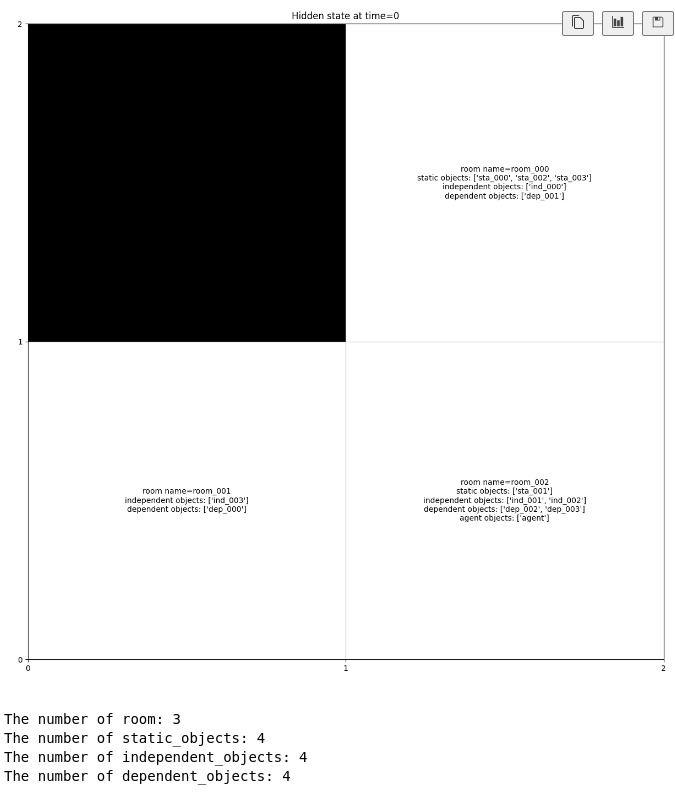

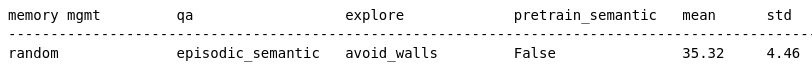

Let's take a look at [the_plot](../training_results/LSTM/s/pretrain=False/2023-11-05%2021:53:45.868096/plot.pdf)

In [32]:
from glob import glob
from explicit_memory.utils import read_yaml
import numpy as np

results_all = []
for results_path in glob("../training_results/LSTM/s/pretrain=False/*/results.yaml"):
    results = read_yaml(results_path)
    test_score = results["test_score"]["mean"]
    results_all.append(test_score)

np.mean(results_all), np.std(results_all)

(23.72, 6.901130342197574)

## room_size=m
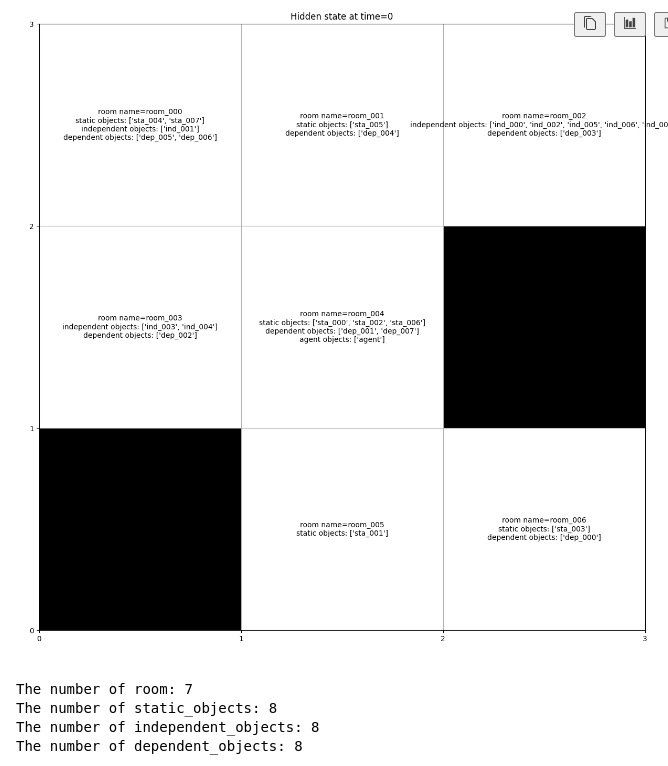

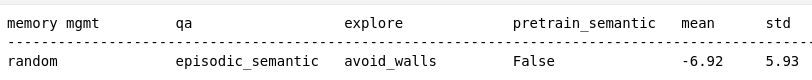

Let's take a look at [the_plot](../training_results/LSTM/m/pretrain=False/2023-11-06%2004:16:12.034395/plot.pdf)

In [43]:
from glob import glob
from explicit_memory.utils import read_yaml
import numpy as np

results_all = []
for results_path in glob("../training_results/LSTM/m/pretrain=False/*/results.yaml"):
    results = read_yaml(results_path)
    test_score = results["test_score"]["mean"]
    results_all.append(test_score)

np.mean(results_all), np.std(results_all)

(-22.04, 8.70255135003523)

In [ ]:
from agent.dqn import DQNMMAgent
import random
import logging

logger = logging.getLogger()
logger.disabled = True


config = {
    "question_prob": 1.0,
    "terminates_at": 99,
    "randomize_observations": True,
    "room_size": "xxs",
}

for pretrain_semantic in [False, True]:
    for test_seed in [0, 1, 2, 3, 4]:
        all_params = {
            "env_str": "room_env:RoomEnv-v2",
            "max_epsilon": 1.0,
            "min_epsilon": 0.1,
            "epsilon_decay_until": 100 * 20,
            "gamma": 0.8,
            "capacity": {
                "episodic": 4,
                "episodic_agent": 4,
                "semantic": 4,
                "short": 1,
            },
            "nn_params": {
                "hidden_size": 64,
                "num_layers": 2,
                "embedding_dim": 32,
                "v1_params": None,
                "v2_params": {},
                "memory_of_interest": [
                    "episodic",
                    "semantic",
                    "short",
                ],
            },
            "num_iterations": 100 * 20,
            "replay_buffer_size": 1024,
            "warm_start": 256,
            "batch_size": 256,
            "target_update_interval": 10,
            "pretrain_semantic": pretrain_semantic,
            "run_test": True,
            "num_samples_for_results": 10,
            "train_seed": test_seed + 5,
            "plotting_interval": 10,
            "device": "cpu",
            "test_seed": test_seed,
            "qa_policy": "episodic_semantic",
            "explore_policy": "avoid_walls",
            "env_config": config,
            "ddqn": True,
            "dueling_dqn": True,
            "split_reward_training": False,
        }

        agent = DQNMMAgent(**all_params)
        agent.train()